In [40]:
from fastai.basics import *
%matplotlib inline

In [41]:
n=100
x = torch.ones(n,2)
x[:,0].uniform_(-1,1)
x[:5]

tensor([[ 0.6619,  1.0000],
        [ 0.2640,  1.0000],
        [-0.1971,  1.0000],
        [-0.7382,  1.0000],
        [-0.5764,  1.0000]])

In [42]:
a=tensor(3.,2.);a

tensor([3., 2.])

In [43]:
y=x@a + torch.randn(n);y


tensor([ 4.6586,  2.7620,  1.8921, -0.7882, -0.3759,  1.9259, -2.4328,  1.6370,
         4.5592,  3.9398, -1.0374,  2.6093,  5.5186,  2.5306,  1.4339,  4.1121,
         2.3580,  2.5247,  0.9321,  4.2036,  0.8259,  2.4533,  3.5873, -0.9935,
         2.8317,  3.2549,  1.7995,  4.1532, -0.6909,  0.7372, -0.3882,  2.8465,
         1.5987,  2.7475, -0.8399,  2.1184, -1.2261,  2.2182, -0.8293,  4.8662,
         1.9627,  3.0619,  0.8873,  0.9759,  1.4482,  1.1151,  0.6899,  2.6782,
         4.8582,  0.3321, -1.7755, -0.7196,  4.5676,  3.7116,  1.7760,  3.1421,
         1.2394, -0.3175,  3.3555,  2.9850,  4.5979, -0.6533,  0.9163,  4.6544,
         1.0185, -1.2746,  2.9292, -0.9630,  4.6639,  3.6038,  0.5640,  1.2647,
         3.3806,  2.0315,  5.4506, -1.0506,  5.0458,  4.3690,  1.6541,  5.0986,
        -1.0607,  0.2724,  6.0663, -3.5059,  2.4196,  0.6820,  1.1344,  2.4889,
         4.7936,  2.9782,  5.6779,  1.6256,  3.9391,  5.2221,  2.1784,  3.6477,
        -0.7237,  0.4178, -0.8123,  0.60

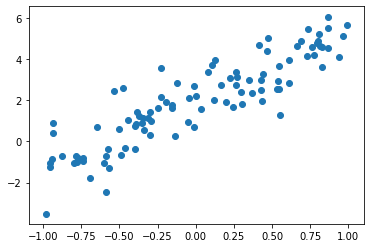

In [44]:
plt.scatter(x[:,0],y)

In [45]:
def mse(y_hat,y): return ((y_hat-y)**2).mean()

In [46]:
a=tensor(-1.,1.)

In [47]:
y_hat = x@a

In [48]:
mse(y_hat,y)


tensor(7.7662)

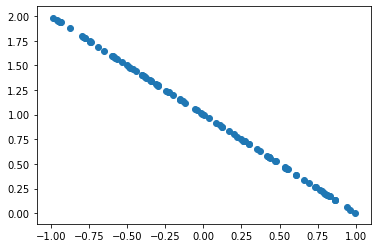

In [49]:
plt.scatter(x[:,0],y_hat)

In [50]:
??tensor

In [51]:
a=nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [52]:
def update():
    y_hat = x@a
    loss=mse(y_hat,y)
    if t%10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr*a.grad)
        a.grad.zero_()
    

In [53]:
lr=1e-1
for t in range(0,100):
    update()


tensor(7.7662, grad_fn=<MeanBackward1>)
tensor(2.4409, grad_fn=<MeanBackward1>)
tensor(1.2924, grad_fn=<MeanBackward1>)
tensor(0.9986, grad_fn=<MeanBackward1>)
tensor(0.9227, grad_fn=<MeanBackward1>)
tensor(0.9032, grad_fn=<MeanBackward1>)
tensor(0.8981, grad_fn=<MeanBackward1>)
tensor(0.8968, grad_fn=<MeanBackward1>)
tensor(0.8965, grad_fn=<MeanBackward1>)
tensor(0.8964, grad_fn=<MeanBackward1>)


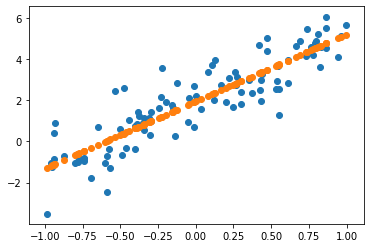

In [54]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

In [55]:

from matplotlib import animation, rc
rc('animation', html='jshtml')
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)


In [39]:
x = torch.ones(2,3)

In [40]:
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [44]:
x.normal_().fmod_(2)

tensor([[-0.1132,  1.8212,  1.7392],
        [ 0.3334, -0.0842,  0.5487]])

In [ ]:
def collab_learner(data,n_factors:int=None,y_range:OptRange=None) ->Learner:
    model = EmbeddingDotBias(n_factors,len(u),len(m),y_range=y_range)
    
def trunc_normal_(x:Tensor,mean=0.,std=1.):
    return x.normal_().fmod_(2).mul_(std).add_(mean)

def embedding(ni,nf)->nn.Module:
    emb = nn.Embedding(ni,nf)
    with torch.no_grad: trunc_normal_(emb.weight,std=0.01)
    
class EmbeddingDotBias(nn.Module):
    def __init__(self,n_factors:int,n_users:int,n_items:int,y_range=Tuple[float,float]=None):
        self.y_range= y_range
        self.u_weights,self.i_weights,self.u_biases,self.i_biases = [embedding(o*) for o in [(n_users,n_factors),
                                                        (n_items,n_factors),(n_users,1),(n_items,1)]]
        
    def forward(users:LongTensor,items:LongTensor) ->Tensor:
        dot = self.u_weights(users)*self.i_weights(items)
        res = dot.sum(1) + self.u_biases.squeeze() + self.i_biases.squeeze()
        if y_range is None: return res
        return torch.sigmoid(res)*(y_range[1]-y_range[0])+self.y_range[0]
        